In [2]:
library(ggplot2)

In [4]:
BANK<-read.csv("BANK_ATM_DATA.csv",header = TRUE,sep = ',')

In [5]:
head(BANK)

,ATM_TON,ATM_TOFF,POS_T,CARDS,ATM_TRAN,POS_TRAN,ATM_AMT,POS_AMT
1,1832,804,2709,6530298,12066286,277161,22964.8,450.3
2,1843,806,2736,6653052,12170249,306454,22543.1,522.9
3,1860,812,2759,6787984,11683010,281096,29795.7,451.7
4,1866,825,2762,6932458,11913974,289493,24490.7,452.7
5,1888,840,2756,7068870,11949923,337251,23855.6,547.2
6,1930,827,2773,7214644,12197975,311189,23825.6,491.2


In [6]:
# Include relevant variables
BANK <- data.frame(c(BANK$ATM_TON+BANK$ATM_TOFF),BANK$CARDS,BANK$ATM_TRAN,BANK$ATM_AMT)
head(BANK)


,c.BANK.ATM_TON...BANK.ATM_TOFF.,BANK.CARDS,BANK.ATM_TRAN,BANK.ATM_AMT
1,2636,6530298,12066286,22964.8
2,2649,6653052,12170249,22543.1
3,2672,6787984,11683010,29795.7
4,2691,6932458,11913974,24490.7
5,2728,7068870,11949923,23855.6
6,2757,7214644,12197975,23825.6


In [7]:
colnames(BANK) <- c("ATM_MACHINE","TOTAL_CARDS","ATM_TRAN","ATM_AMT")

    ATM_TRAN         ATM_MACHINE      ATM_AMT       TOTAL_CARDS      
 Min.   : 6340901   Min.   :2636   Min.   :19905   Min.   : 6530298  
 1st Qu.: 8114410   1st Qu.:3313   1st Qu.:23854   1st Qu.: 7535884  
 Median : 9806348   Median :4274   Median :27529   Median : 8878174  
 Mean   :10007711   Mean   :4448   Mean   :29211   Mean   : 9262243  
 3rd Qu.:12085777   3rd Qu.:5392   3rd Qu.:32822   3rd Qu.:10828323  
 Max.   :13139184   Max.   :6639   Max.   :42439   Max.   :13156755  

,ATM_TRAN,ATM_MACHINE,ATM_AMT,TOTAL_CARDS
ATM_TRAN,1.0000000,0.2823353,0.6388598,0.4098925
ATM_MACHINE,0.2823353,1.0000000,0.8872908,0.9811313
ATM_AMT,0.6388598,0.8872908,1.0000000,0.9329924
TOTAL_CARDS,0.4098925,0.9811313,0.9329924,1.0000000


[1] "ATM_MACHINE" "TOTAL_CARDS" "ATM_TRAN"    "ATM_AMT"

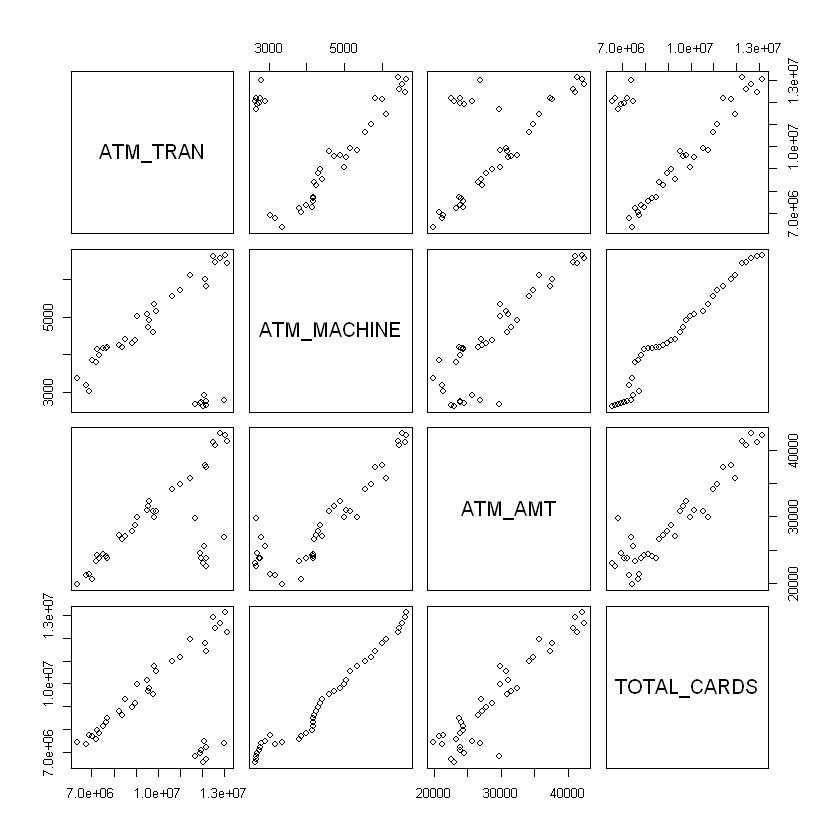

In [8]:
BANK_train<-sample(BANK[1:40,])
BANK_test<-sample(BANK[41:50,])

summary(BANK_train)
cor(BANK_train)
pairs(BANK_train)
names(BANK)

In [9]:
## Model 1
m_train1 <- lm(ATM_AMT ~ ATM_MACHINE + TOTAL_CARDS + ATM_TRAN, data = BANK)
summary(m_train1)


Call:
lm(formula = ATM_AMT ~ ATM_MACHINE + TOTAL_CARDS + ATM_TRAN, 
    data = BANK)

Residuals:
    Min      1Q  Median      3Q     Max 
-2599.8  -617.0  -123.7   478.9  5389.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.682e+03  1.005e+03  -1.673    0.101    
ATM_MACHINE  3.786e+00  3.289e-01  11.510 3.86e-15 ***
TOTAL_CARDS  1.142e-04  1.527e-04   0.748    0.459    
ATM_TRAN     1.301e-03  1.135e-04  11.458 4.51e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1432 on 46 degrees of freedom
Multiple R-squared:  0.9717,	Adjusted R-squared:  0.9698 
F-statistic: 526.3 on 3 and 46 DF,  p-value: < 2.2e-16


In [10]:
## Model 2
m_train2 <- lm(ATM_AMT ~ ATM_MACHINE + ATM_TRAN, data = BANK)
summary(m_train2)


Call:
lm(formula = ATM_AMT ~ ATM_MACHINE + ATM_TRAN, data = BANK)

Residuals:
    Min      1Q  Median      3Q     Max 
-2645.7  -759.7   -57.3   496.5  5383.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.911e+03  9.526e+02  -2.007   0.0506 .  
ATM_MACHINE  3.998e+00  1.647e-01  24.271   <2e-16 ***
ATM_TRAN     1.339e-03  1.011e-04  13.242   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1425 on 47 degrees of freedom
Multiple R-squared:  0.9713,	Adjusted R-squared:  0.9701 
F-statistic: 796.7 on 2 and 47 DF,  p-value: < 2.2e-16


  rstudent unadjusted p-value Bonferonni p
3 4.884753         1.2927e-05   0.00064637

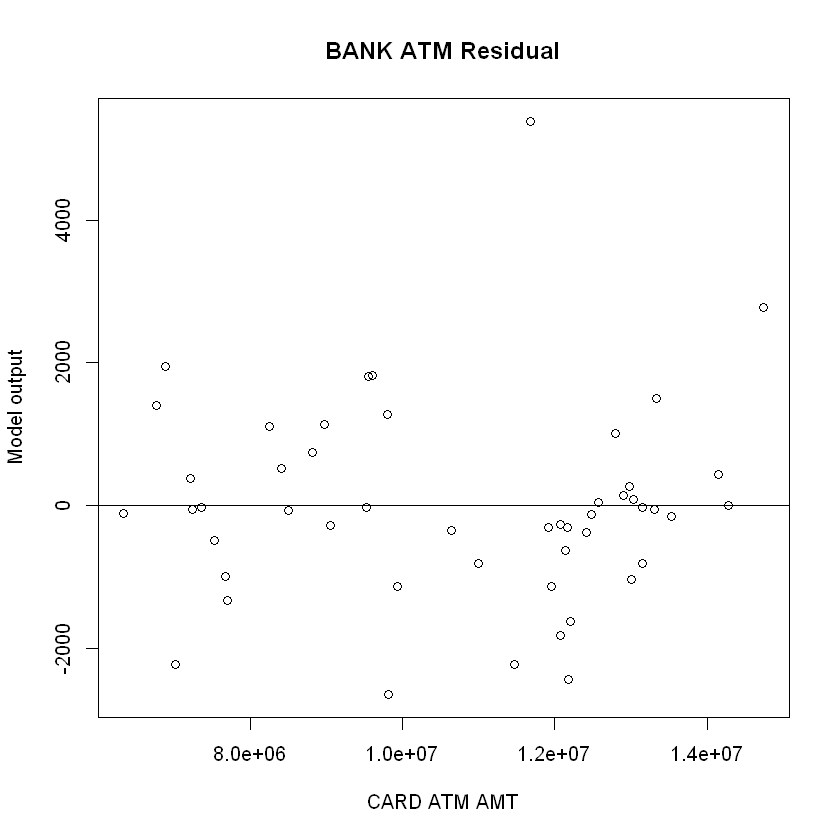

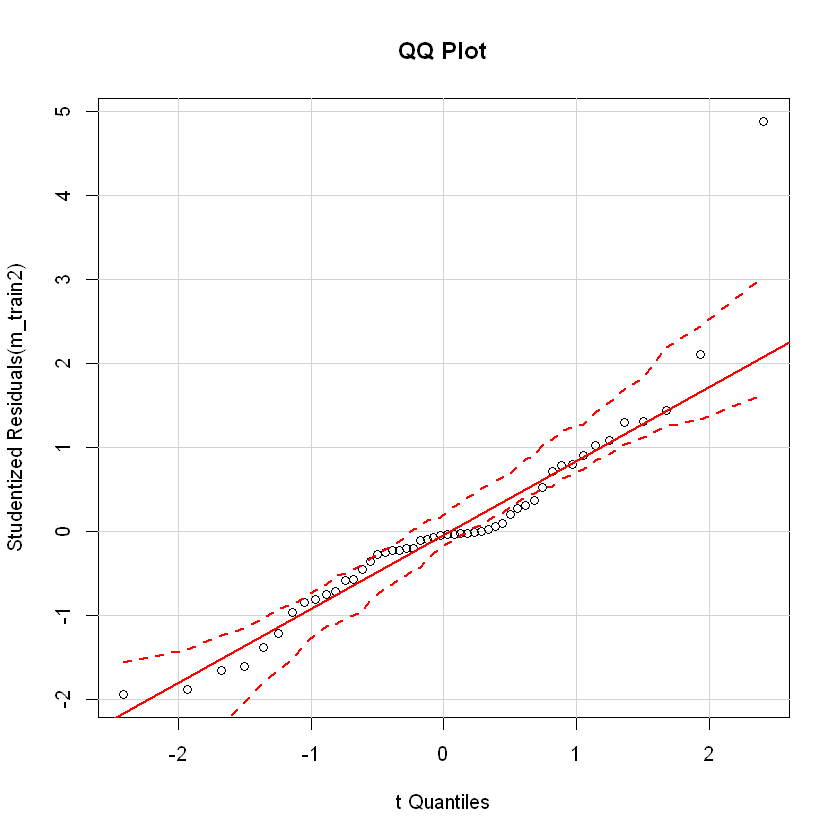

In [11]:
## Plotting Residual
vResidual <- resid(m_train2)

plot(BANK$ATM_MACHINE + BANK$ATM_TRAN, vResidual, 
     xlab = "CARD ATM AMT", ylab = "Model output",
     main = "BANK ATM Residual")
abline(0,0)

outlierTest(m_train2)
qqPlot(m_train2, main="QQ Plot")
#####################

In [12]:
x<-fitted(m_train2,BANK_test)
class(x)
v_check <- data.frame(BANK_test$ATM_AMT, 
                      x, 
                      ((c(BANK_test$ATM_AMT - x)/BANK_test$ATM_AMT)*100))
v_check
fitted.values(m_train2,BANK_test)


[1] "numeric"

,BANK_test.ATM_AMT,x,X..c.BANK_test.ATM_AMT...x..BANK_test.ATM_AMT....100.
1,41423.33,24781.36,40.17535
2,42535.13,24972.51,41.28967
3,44041.93,24412.21,44.57053
4,41095.87,24797.37,39.65971
5,41945.48,24993.43,40.41448
6,42361.25,25441.45,39.94169
7,41384.78,26604.66,35.71391
8,45272.64,25874.84,42.84663
9,45533.14,19396.39,57.4016
10,48140.91,19836.94,58.79402


1        2        3        4        5        6        7        8 
24781.36 24972.51 24412.21 24797.37 24993.43 25441.45 26604.66 25874.84 
       9       10       11       12       13       14       15       16 
19396.39 19836.94 20007.58 22946.22 22905.25 23869.61 24330.64 24823.42 
      17       18       19       20       21       22       23       24 
25038.92 25128.78 26109.21 26128.18 27079.92 27558.43 27122.81 29607.60 
      25       26       27       28       29       30       31       32 
29765.36 30540.22 30213.80 31076.26 31970.23 32568.59 34535.54 35619.75 
      33       34       35       36       37       38       39       40 
37676.13 38346.33 37906.64 41383.34 40735.75 41429.18 41263.57 42066.82 
      41       42       43       44       45       46       47       48 
42234.38 42688.96 42540.74 41469.10 41808.35 42406.85 42421.00 45269.90 
      49       50 
45102.38 45359.56

In [13]:
v_predict <- predict(m_train2,BANK_test)
summary(v_predict)
v_final <- data.frame(BANK_test,v_predict)
head(v_final)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  41470   42280   42480   43130   44500   45360 

,ATM_AMT,TOTAL_CARDS,ATM_TRAN,ATM_MACHINE,v_predict
41,41423.33,13429748,13138728,6642,42234.38
42,42535.13,13165481,13520109,6628,42688.96
43,44041.93,14404106,13322780,6657,42540.74
44,41095.87,14453934,12408775,6695,41469.1
45,41945.48,17110025,12892173,6618,41808.35
46,42361.25,17567747,13300420,6631,42406.85


In [16]:
v_check <- data.frame(v_predict, 
                      (c(BANK_test$ATM_AMT - v_predict)/BANK_test$ATM_AMT)*100,
                      abs(round(((c(BANK_test$ATM_AMT - v_predict)/BANK_test$ATM_AMT)*100))))
colnames(v_check) <- c("PREDICTED_VALUE","DIFF_PERCENTAGE","ABS_DIFF")
names(v_check)



[1] "PREDICTED_VALUE" "DIFF_PERCENTAGE" "ABS_DIFF"

In [17]:
i<-1
for (i in length(v_check)) {
        if(abs(v_check$DIFF_PERCENTAGE[i]) <= 5) {
                v_check$DIFFERENCE <- 0
        }else {
                v_check$DIFFERENCE <- 1
        }
}


In [20]:
v_FinalOutput <- data.frame(BANK_test,v_check$PREDICTED_VALUE,v_check$DIFFERENCE)
colnames(v_FinalOutput)[5] <- "PREDICTED ATM AMOUNT"
colnames(v_FinalOutput)[6] <- "PREDICTION (0:Prediction with maximum 5% error)"
v_FinalOutput

,ATM_AMT,TOTAL_CARDS,ATM_TRAN,ATM_MACHINE,PREDICTED ATM AMOUNT,PREDICTION (0:Prediction with maximum 5% error)
41,41423.33,13429748,13138728,6642,42234.38,0
42,42535.13,13165481,13520109,6628,42688.96,0
43,44041.93,14404106,13322780,6657,42540.74,0
44,41095.87,14453934,12408775,6695,41469.1,0
45,41945.48,17110025,12892173,6618,41808.35,0
46,42361.25,17567747,13300420,6631,42406.85,0
47,41384.78,17939391,13000369,6735,42421,0
48,45272.64,19448862,14277259,7020,45269.9,0
49,45533.14,19748769,14143158,7023,45102.38,0
50,48140.91,16221036,14738478,6888,45359.56,0
